# Modelo MLP - Multi Layer Perceptron

In [ ]:
# !pip install --upgrade pip
# !pip install tensorflow
# !pip install keras

In [1]:
# Librerías generales
import numpy as np
import pandas as pd

# Librerías para visualización
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Librerías de Keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv', header=None)

## EDA

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


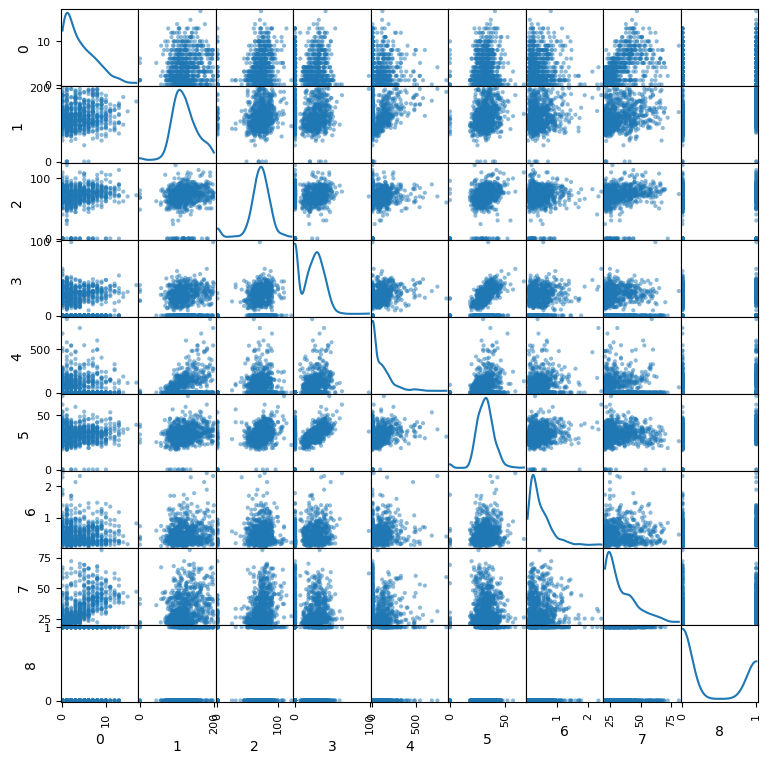

In [6]:
scatter_matrix(data, 
               figsize=(len(data.columns),
                              len(data.columns)),
               diagonal = 'kde')
plt.show()

## Vairable dependiente y varaibles independientes

In [7]:
X_tra = np.asarray(data.iloc[:, 0:8])

In [8]:
Y_tra = np.asarray(data[8])

## Modelo en Keras

### 1- Definición del modelo.
Los pasos comunes para la creación de un modelo en Keras son:
* Definición de un modelo secuencial con __<code>sequential()</code>__
* Definir variable con el número de dimensiones de nuestro modelo, es decir el número de variables, en este caso 8. Aconsejable crear una variable llamada __<code>input_dim</code>__
* Añadir capas con __<code>.add()</code>__
* Para añadir capas de neuronas completamente conectadas utilizaremos la clase __<code>Dense</code>__ a la cuál le tendremos que pasar como parámetro el número de neuronas de la capa y la función de activación. En este caso vamos a utilizar la función de activación __ReLu__ (rectified linear unit activation function), hay muchos más tipos de funciones de activación que pueden ser consultados en https://keras.io/activations/ 

## MLP
+ Capa de entrada (con una dimensión del número de columnas)
+ Capa oculta (con un número de neuronas y, la función de activación Relu)
+ Capa de salida (con número de neuronas, como la longitud de un valor cualquiera de Y, función de activación softmax)


In [11]:
X_tra.shape

(768, 8)

In [13]:
X_tra.shape[1]

8

In [19]:
Y_tra[132]


TypeError: object of type 'numpy.int64' has no len()

In [28]:
# Inicializar la arquitectura de la red
model_base = Sequential()

# Capa de entrada y capa oculta
model_base.add(Dense(
    input_dim = X_tra.shape[1], # Dimensión de la capa de entrada
    units     = 12,             # Neuronas de la capa oculta n1
    activation='relu'           # Función de activación
                                #   capa oculta -> RELU
))

# Capa de salida
model_base.add(Dense(
    units = 1,                  # Neuronas de la capa de salida
    activation = 'softmax'      # Función de activacíon capa de salida softmax
))

In [33]:
# 2 Compilar modelo
model_base.compile(loss      = 'binary_crossentropy', 
                   optimizer = 'adam', 
                   metrics   = ['accuracy'] )

In [34]:
model_base.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 12)                108       
                                                                 
 dense_6 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# 3 entrenar
model_base.fit(X_tra, y = Y_tra, 
               batch_size = 4, # Lotes de 24 filas
               epochs     = 10, 
               validation_split = 0.2)

Epoch 1/10
154/154 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.3469 - val_loss: 0.6647 - val_accuracy: 0.3571
Epoch 2/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5979 - accuracy: 0.3469 - val_loss: 0.6799 - val_accuracy: 0.3571
Epoch 3/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.3469 - val_loss: 0.6690 - val_accuracy: 0.3571
Epoch 4/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6410 - accuracy: 0.3469 - val_loss: 0.6466 - val_accuracy: 0.3571
Epoch 5/10
154/154 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.3469 - val_loss: 0.7170 - val_accuracy: 0.3571
Epoch 6/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.3469 - val_loss: 0.6620 - val_accuracy: 0.3571
Epoch 7/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.3469 - val_loss: 0.6553 - val_accuracy: 0.3571
Epoch 

In [38]:
# Definimos la estructura del modelo en Keras
input_dim = 8

# Inicializamos el modelo
model = Sequential()

# Definimos la primera capa de entrada con el número de dimensiones y de neuronas de la entrada
model.add(Dense(12, input_dim = input_dim, activation='relu'))

# Definimos la segunda capa oculta intermedia
model.add(Dense(8, activation='relu'))

# Definimos la segunda capa oculta intermedia
model.add(Dense(6, activation='relu'))

# Definimos la segunda capa oculta intermedia
model.add(Dense(4, activation='relu'))

# Definimos la capa de salida
model.add(Dense(1, activation='sigmoid'))

### 2 - Compilación del modelo

Una vez que hemos definido nuestro modelo, tenemos que compilarlo, durante este proceso el backend que tengamos fijado (en este caso TensorFlow), se encargará de elegir cómo representar la red neuronal y elegir el hardware de ejecución siendo CPU o GPU.

Para compilar un modelo tenemos que especificar algunos parámetros adicionales antes de entrenar la red neuronal y que esta busque los mejores pesos entre los inputs.

Para ubicar en la red el mejor set de pesos tenemos que especificar una función de périrda o __loss function__, estas funciones básicamente difieren del tipo de problema que queremos resolver a través de nuestros datos, dentro de la función __<code>compile()</code>__ utilizaremos el parámetro __<code>loss</code>__ para especificar la función de pérdida. En este caso antendiendo a la variable V8, estamos en un problema de clasificación binaria por lo tanto utilizaremos:
* Problemas de clasificación binaria: __<code>binary_crossentropy</code>__
* Podemos encontrar todas las funciones de pérdida que soporta Keras en el siguiente enlace: https://keras.io/losses/

El siguiente paso tras escoger una función de pérdida es definir el parámetro __<code>optimizer</code>__, para esta ocasión vamos tomar el optimizador basado en gradiente descendente denominado __adam__, como siempre, la elección de estos parámetros se basa en el tipo de problema que vayamos a resolver o el experimento que queramos realizar, todos los optimizadores se encuentran en el siguiente enlace: https://keras.io/optimizers/

Finalmente, como último paso antes de compilar el modelo escogemos las métricas que queremos registrando ya sea en cada etapa del modelo o a nivel general, en este caso simplemente vamos a tomar como referencia el __accuracy__, todas las métricas disponibles están disponibles en: https://keras.io/metrics/

In [39]:
# Compilamos el modelo
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Podemos imprimir un resumen de la estructura de nuestro modelo de Keras con el comando __<code>summary()</code>__

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 12)                108       
                                                                 
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dense_9 (Dense)             (None, 6)                 54        
                                                                 
 dense_10 (Dense)            (None, 4)                 28        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 299 (1.17 KB)
Trainable params: 299 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3 - Ajuste del modelo

El último paso para realizar la ejecución completa del modelo es realizar el ajuste, para ello, tal y como se ha realizado con compile, y como está presente en otras librerías por ejemplo: regresión lineal con Scikit Learn, en Keras existe una función llamada __<code>.fit()</code>__ para ajustar el modelo, los parámetros que tenemos que pasar a la función de ajuste son los siguientes:
* Conjunto X.
* Conjunto Y.
* epoch: Número de etapas que tiene el modelo, en cada etapa se actualizan los pesos del modelo.
* batch_size: Se refiere a la cantidad de datos (filas) que vamos a tomar para cada iteracción y así actualizar los pesos.
* verbose: Información que se irá mostrando en cada etapa del modelo, esixten tres niveles de información disponibles:
* * 0: No se muestra nada _silent mode_.
* * 1: Barra de progreso.
* * 2: Una línea por etapa.

Para este modelo vamos a tomar __200__ etapas y un batch size de __10__, es decir, que en cada etapa se realizarán (200/10) = __20__ actualizaciones de los pesos del modelo.

In [41]:
modelo_multi_layer = model.fit(X_tra, Y_tra, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
77/77 [==============================] - 1s 1ms/step - loss: 1.1243 - accuracy: 0.5273
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7686 - accuracy: 0.6081
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.6016
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.6367
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6341 - accuracy: 0.6693
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6236 - accuracy: 0.6706
Epoch 7/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.6615
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6115 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.6862
Epoch 11/

77/77 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7331
Epoch 84/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7448
Epoch 85/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7318
Epoch 86/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7370
Epoch 87/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7357
Epoch 88/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7383
Epoch 89/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7396
Epoch 90/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.7383
Epoch 91/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7539
Epoch 92/200
77/77 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7448
Epoch 93/200


77/77 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7826
Epoch 165/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.7721
Epoch 166/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7786
Epoch 167/200
77/77 [==============================] - 0s 4ms/step - loss: 0.4528 - accuracy: 0.7891
Epoch 168/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7812
Epoch 169/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.7656
Epoch 170/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7839
Epoch 171/200
77/77 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.7708
Epoch 172/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7878
Epoch 173/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.7747
Epoc

In [43]:
modelo_multi_layer.history.keys()

dict_keys(['loss', 'accuracy'])

In [44]:
modelo_multi_layer.history["accuracy"]

[0.52734375,
 0.6080729365348816,
 0.6015625,
 0.63671875,
 0.6692708134651184,
 0.6705729365348816,
 0.6614583134651184,
 0.6627604365348816,
 0.6705729365348816,
 0.6861979365348816,
 0.6783854365348816,
 0.7018229365348816,
 0.70703125,
 0.6901041865348816,
 0.67578125,
 0.6848958134651184,
 0.7005208134651184,
 0.671875,
 0.703125,
 0.6901041865348816,
 0.703125,
 0.7018229365348816,
 0.7265625,
 0.7109375,
 0.7005208134651184,
 0.7096354365348816,
 0.7005208134651184,
 0.70703125,
 0.6953125,
 0.7044270634651184,
 0.7161458134651184,
 0.70703125,
 0.70703125,
 0.6940104365348816,
 0.7109375,
 0.6888020634651184,
 0.71484375,
 0.7109375,
 0.7109375,
 0.71875,
 0.7278645634651184,
 0.7109375,
 0.7291666865348816,
 0.71484375,
 0.7174479365348816,
 0.7135416865348816,
 0.71484375,
 0.7096354365348816,
 0.70703125,
 0.70703125,
 0.7291666865348816,
 0.7109375,
 0.7239583134651184,
 0.7135416865348816,
 0.6927083134651184,
 0.71875,
 0.7356770634651184,
 0.7291666865348816,
 0.72526043

### 4 - Obtención de métricas y resultados.

Podemos acceder a los valores registrados en las métricas haciendo uso de la función __<code>history[]</code>__

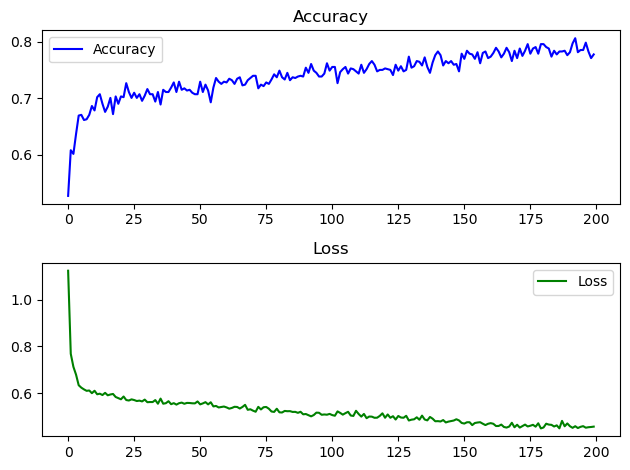

In [45]:
#Plotting metrics
plt.subplot(211)
plt.title("Accuracy")
plt.plot(modelo_multi_layer.history["accuracy"], color="b", label="Accuracy")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(modelo_multi_layer.history["loss"], color="g", label="Loss")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

Finalmente, con la función __<code>evaluate()</code>__ podemos acceder a los valores del modelo que hayamos entrenado, en nuestro caso 'loss' y 'accuracy'.

__NOTA__: __<code>model.evaluate()</code>__ También dispone de argumentos como verbose y otras opciones de multiprocessing para cuando queramos evaluar conjuntos de datos muy grandes.

In [46]:
model.evaluate(X_tra, Y_tra)

24/24 [==============================] - 0s 911us/step - loss: 0.4479 - accuracy: 0.7812


[0.4479202330112457, 0.78125]

### 5 - Predicciones

Para realizar predicciones existe la función __<code>model.predict()</code>__, esta función nos devuelve probabilidades, pero, podemos umbralizar dichas predicciones para obtener la etiqueta exacta.

In [48]:
np.round(model.predict(X_tra),2)

24/24 [==============================] - 0s 975us/step


array([[0.68],
       [0.06],
       [0.73],
       [0.06],
       [0.65],
       [0.17],
       [0.12],
       [0.44],
       [0.74],
       [0.03],
       [0.14],
       [0.83],
       [0.51],
       [1.  ],
       [0.73],
       [0.15],
       [0.37],
       [0.22],
       [0.28],
       [0.14],
       [0.09],
       [0.25],
       [0.84],
       [0.26],
       [0.68],
       [0.48],
       [0.68],
       [0.01],
       [0.31],
       [0.19],
       [0.3 ],
       [0.41],
       [0.04],
       [0.02],
       [0.4 ],
       [0.26],
       [0.59],
       [0.31],
       [0.12],
       [0.34],
       [0.68],
       [0.53],
       [0.09],
       [0.91],
       [0.65],
       [0.84],
       [0.46],
       [0.04],
       [0.37],
       [0.07],
       [0.  ],
       [0.12],
       [0.1 ],
       [0.62],
       [0.65],
       [0.05],
       [0.71],
       [0.09],
       [0.56],
       [0.2 ],
       [0.03],
       [0.52],
       [0.03],
       [0.51],
       [0.42],
       [0.12],
       [0.

In [53]:
y_pred = (model.predict(X_tra) > 0.5).astype("int32").ravel()
y_pred

24/24 [==============================] - 0s 1ms/step


array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [52]:
Y_tra

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [55]:
Y_tra[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [56]:
y_pred[:10]

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
confusion_matrix(y_true=Y_tra, y_pred=y_pred)

array([[470,  30],
       [138, 130]], dtype=int64)

In [59]:
accuracy_score(y_true=Y_tra, y_pred=y_pred)

0.78125

## Ejercicio.

No tenemos un dataset con una enorme cantidad de datos, prueba una topología de red con esta configuracíon:
+ Capa de entrada
+ Capa oculta
+ Capa de salida

¿Qué resultados obtienes?

In [60]:
model_base.evaluate(X_tra, Y_tra)

24/24 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.3490


[0.666119396686554, 0.3489583432674408]